Files already downloaded and verified
torch.Size([15000, 3, 32, 32])
Examples of train set:
tensor([2, 2, 1, 1, 2, 2, 2, 1, 1, 0])
tensor(176., device='cuda:0')


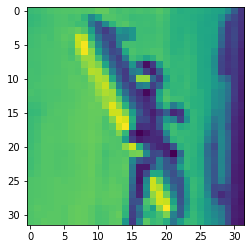

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import numpy as np
import copy
from model_CIFAR10 import Model
from Optimization_Method import projection_simplex_sort as pj
import pickle
import matplotlib.pyplot as plt
import random
#example of pickle
# l = [1,2,3,4]
# with open("test", "wb") as fp:   #Pickling
#     pickle.dump(l, fp)

# with open("test", "rb") as fp:   # Unpickling
#     b = pickle.load(fp)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.get_device_name(0)

#data_name = 'MNIST'
#data_name = 'F-MNIST'
data_name = 'CIFAR10'
data_path = './data/'+ data_name +'.py'
exec(open(data_path).read())

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (2,1, 0)),interpolation='nearest')

imshow(train_set.data[755].cpu()[2].unsqueeze(0))

epoch_number = 15000
max_epoch = 100
b,b_1,q = 3000,200,200 
sim_time = 30
print(torch.max(train_set.data[12000][0][16]))

SAPD Variance Reduction Method

In [2]:
# b,b_1,q,m = 3000,200,200,50
# max_epoch = 50
# sim_time = 1
torch.manual_seed(2)
from algorithms_CIFAR10 import SAPD_VR
SAPD_VR(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,
      b = b, b_1 = b_1, q = q,
       lr_x0=0.005, lr_y = 0.00001, theta0=0.8, theta_rate= 1.00,sim_time=sim_time,
       is_save_data=True, is_show_result=True, is_adaptive= True)

sample complexity is 16600 , epoch is 1 , acc is tensor(0.6316, device='cuda:0') , loss is 3.1386883
sample complexity is 34200 , epoch is 2 , acc is tensor(0.7005, device='cuda:0') , loss is 3.109048
sample complexity is 53000 , epoch is 3 , acc is tensor(0.7362, device='cuda:0') , loss is 3.088044
sample complexity is 63200 , epoch is 4 , acc is tensor(0.7471, device='cuda:0') , loss is 3.0798244
sample complexity is 85000 , epoch is 5 , acc is tensor(0.7465, device='cuda:0') , loss is 3.0748422
sample complexity is 96800 , epoch is 6 , acc is tensor(0.7547, device='cuda:0') , loss is 3.0725086
sample complexity is 109400 , epoch is 7 , acc is tensor(0.7557, device='cuda:0') , loss is 3.0708444
sample complexity is 122800 , epoch is 8 , acc is tensor(0.7589, device='cuda:0') , loss is 3.070634
sample complexity is 136200 , epoch is 9 , acc is tensor(0.7581, device='cuda:0') , loss is 3.0695226
sample complexity is 163000 , epoch is 10 , acc is tensor(0.7655, device='cuda:0') , loss i

SMDA Variance Reduction Method

In [2]:
# b,b_1,q = 1000,20,20
# max_epoch = 50
torch.manual_seed(2)
from algorithms_CIFAR10 import SMDA_VR
SMDA_VR(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,
      b = b, b_1 = b_1, q = q,sim_time=sim_time,
       lr_x=0.001, lr_y = 0.00001,rho = 1,
       is_save_data=True, is_show_result=True)

sample complexity is 15000 , epoch is 1 , acc is tensor(0.5222, device='cuda:0') , loss is 3.180881
sample complexity is 30000 , epoch is 2 , acc is tensor(0.5817, device='cuda:0') , loss is 3.1574833
sample complexity is 45800 , epoch is 3 , acc is tensor(0.6107, device='cuda:0') , loss is 3.144904
sample complexity is 60000 , epoch is 4 , acc is tensor(0.6278, device='cuda:0') , loss is 3.1365168
sample complexity is 75000 , epoch is 5 , acc is tensor(0.6437, device='cuda:0') , loss is 3.128901
sample complexity is 90000 , epoch is 6 , acc is tensor(0.6558, device='cuda:0') , loss is 3.1229644
sample complexity is 105000 , epoch is 7 , acc is tensor(0.6737, device='cuda:0') , loss is 3.1165962
sample complexity is 120000 , epoch is 8 , acc is tensor(0.6854, device='cuda:0') , loss is 3.1107485
sample complexity is 135000 , epoch is 9 , acc is tensor(0.6897, device='cuda:0') , loss is 3.1097214
sample complexity is 150000 , epoch is 10 , acc is tensor(0.6819, device='cuda:0') , loss i

SREDA

In [11]:
# b,b_1,q,m = 1000,20,20,50
# max_epoch = 50
m = 10
q = 10
torch.manual_seed(2)
from algorithms_CIFAR10 import SREDA
SREDA(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,
      b = b, b_1 = b_1, q = q, m=m,sim_time=sim_time,
       lr_x=0.005, lr_y = 0.00001,
       is_save_data=True, is_show_result=True)

sample complexity is 15000 , epoch is 1 , acc is tensor(0.4493, device='cuda:0') , loss is 3.1981375
sample complexity is 32400 , epoch is 2 , acc is tensor(0.5027, device='cuda:0') , loss is 3.1844137
sample complexity is 46800 , epoch is 3 , acc is tensor(0.5391, device='cuda:0') , loss is 3.1734183
sample complexity is 61800 , epoch is 4 , acc is tensor(0.5603, device='cuda:0') , loss is 3.1655061
sample complexity is 76200 , epoch is 5 , acc is tensor(0.5830, device='cuda:0') , loss is 3.1571152
sample complexity is 91200 , epoch is 6 , acc is tensor(0.5964, device='cuda:0') , loss is 3.1520689
sample complexity is 105600 , epoch is 7 , acc is tensor(0.6069, device='cuda:0') , loss is 3.14856
sample complexity is 120600 , epoch is 8 , acc is tensor(0.6165, device='cuda:0') , loss is 3.144644
sample complexity is 135000 , epoch is 9 , acc is tensor(0.6233, device='cuda:0') , loss is 3.1415858
sample complexity is 150000 , epoch is 10 , acc is tensor(0.6316, device='cuda:0') , loss i

In [5]:
# from algorithms import SAPDx
# SAPDx(train_set = train_set,data_name = data_name,
#       max_epoch=max_epoch,epoch_numer=epoch_number,
#       b = b, b_1 = b_1, q = q,
#        lr_x=0.00, lr_y = 0.00001, theta0=0.8, theta_rate= 1,sim_time=sim_time,
#        is_save_data=True, is_show_result=True)